# Different approaches of KPI

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cash_request = pd.read_parquet("cleaned_requests.parquet", engine="pyarrow")
fees = pd.read_parquet("cleaned_fees.parquet", engine="pyarrow")


## Approval vs. Rejection Rate
Conlusions:
- Knowing that 3/4 of the time the status are approved but there is still a 1/4 of them that the solicitude is rejected. 
- 1/4 of all the movement is rejected and this is a big chunk to take into consideration and find why it happens
- After analizing how much money they have spend each one I found that does not take in common and its company policy the reason why they decide it

In [3]:
cash_request['status'].value_counts()


status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [4]:
moneyback_rate = (cash_request[cash_request['status'] == 'money_back'].shape[0] / len(cash_request)) * 100
rejection_rate = (cash_request[cash_request['status'] == 'rejected'].shape[0] / len(cash_request)) * 100
direct_debit_rejected_rate = (cash_request[cash_request['status'] == 'direct_debit_rejected'].shape[0] / len(cash_request)) * 100
active_rate = (cash_request[cash_request['status'] == 'active'].shape[0] / len(cash_request)) * 100
transaction_declined_rate = (cash_request[cash_request['status'] == 'transaction_declined'].shape[0] / len(cash_request)) * 100
direct_debit_sent_rate = (cash_request[cash_request['status'] == 'direct_debit_sent'].shape[0] / len(cash_request)) * 100
cancelled_rate = (cash_request[cash_request['status'] == 'canceled'].shape[0] / len(cash_request)) * 100

print("Money Back Rate (%):", moneyback_rate)
print("Rejection Rate (%):", rejection_rate)
print("Direct Debit Rejected Rate (%):", direct_debit_rejected_rate)
print("Active Rate (%):", active_rate)
print("Transaction Declined Rate (%):", transaction_declined_rate)
print("Direct Debit Sent Rate (%):", direct_debit_sent_rate)
print("Cancelled Rate (%):", cancelled_rate)
print("Total Rate (%):",moneyback_rate+rejection_rate+direct_debit_rejected_rate+active_rate+transaction_declined_rate+direct_debit_sent_rate+direct_debit_sent_rate+cancelled_rate)

Money Back Rate (%): 68.40634125990822
Rejection Rate (%): 27.400917813934083
Direct Debit Rejected Rate (%): 3.466833541927409
Active Rate (%): 0.2461410095953275
Transaction Declined Rate (%): 0.2002503128911139
Direct Debit Sent Rate (%): 0.14184397163120568
Cancelled Rate (%): 0.1376720901126408
Total Rate (%): 100.14184397163122


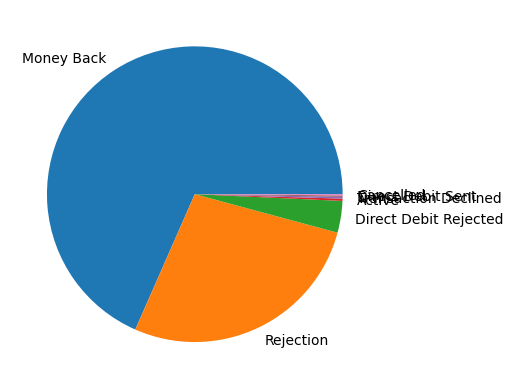

In [5]:
labels_low = ['Money Back', 'Rejection', 'Direct Debit Rejected', 'Active', 'Transaction Declined', 'Direct Debit Sent', 'Cancelled']
values_low = [moneyback_rate, rejection_rate, direct_debit_rejected_rate, active_rate, transaction_declined_rate,direct_debit_sent_rate,cancelled_rate]

plt.pie(values_low, labels=labels_low)
plt.show()

In [6]:
# Join by approval or similar
approval_total_rate = moneyback_rate + active_rate + direct_debit_sent_rate

# Join by canceled or similar
rejection_total_rate = rejection_rate + direct_debit_rejected_rate + transaction_declined_rate + cancelled_rate

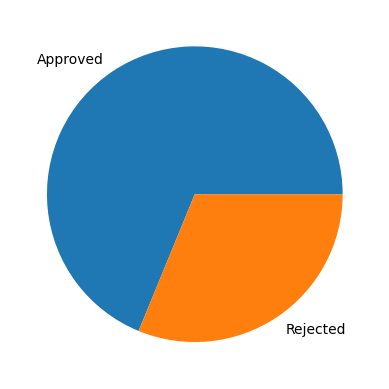

In [7]:
labels = ['Approved', 'Rejected']
values = [approval_total_rate, rejection_total_rate]

plt.pie(values, labels=labels)
plt.show()

In [ ]:
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,<NA>,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,<NA>,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,<NA>,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,<NA>,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,None,NaT,NaT
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686,2020-05-07 09:21:55.320193+00:00,<NA>,NaT,NaT,NaT,regular,NaT,None,NaT,NaT


## Check what amount of money is accepted or cancelled

In [53]:
output_money = cash_request.groupby("status").agg({"amount" : "sum"})
# Join by approval or similar
approval_total_money = output_money["amount"]["money_back"] + output_money["amount"]["active"] + output_money["amount"]["direct_debit_sent"] 

# Join by canceled or similar
rejection_total_money = output_money["amount"]["rejected"] + output_money["amount"]["direct_debit_rejected"] + output_money["amount"]["transaction_declined"] +  output_money["amount"]["canceled"] 
display(approval_total_money)
display(rejection_total_money)

np.float64(1364222.0)

np.float64(618596.0)

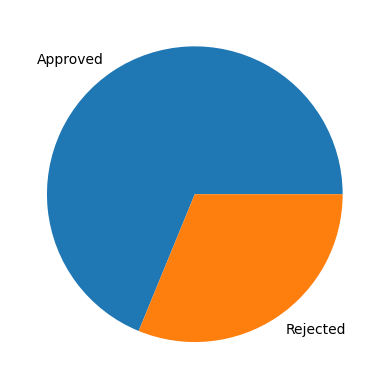

In [63]:
labels = ['Approved', 'Rejected']
values_2 = [approval_total_money, rejection_total_money]

plt.pie(values_2, labels=labels)
plt.show()

## How much they ask the money and where rejected

In [59]:
rejected_requests = cash_request[cash_request['status'] == 'rejected']
rejected_amount_per_user = rejected_requests.groupby('user_id')['amount'].sum()

accepted_requests = cash_request[cash_request['status'] == 'money_back']
accepted_amount_per_user = accepted_requests.groupby('user_id')['amount'].sum()

display(rejected_amount_per_user.value_counts())
display(accepted_amount_per_user.value_counts())


amount
100.0    1044
50.0      499
200.0     332
300.0     126
150.0     113
         ... 
900.0       1
460.0       1
299.0       1
345.0       1
20.0        1
Name: count, Length: 115, dtype: int64

amount
100.0    3199
50.0     1584
25.0     1063
200.0     777
300.0     423
         ... 
395.0       1
52.0        1
56.0        1
54.0        1
24.0        1
Name: count, Length: 118, dtype: int64

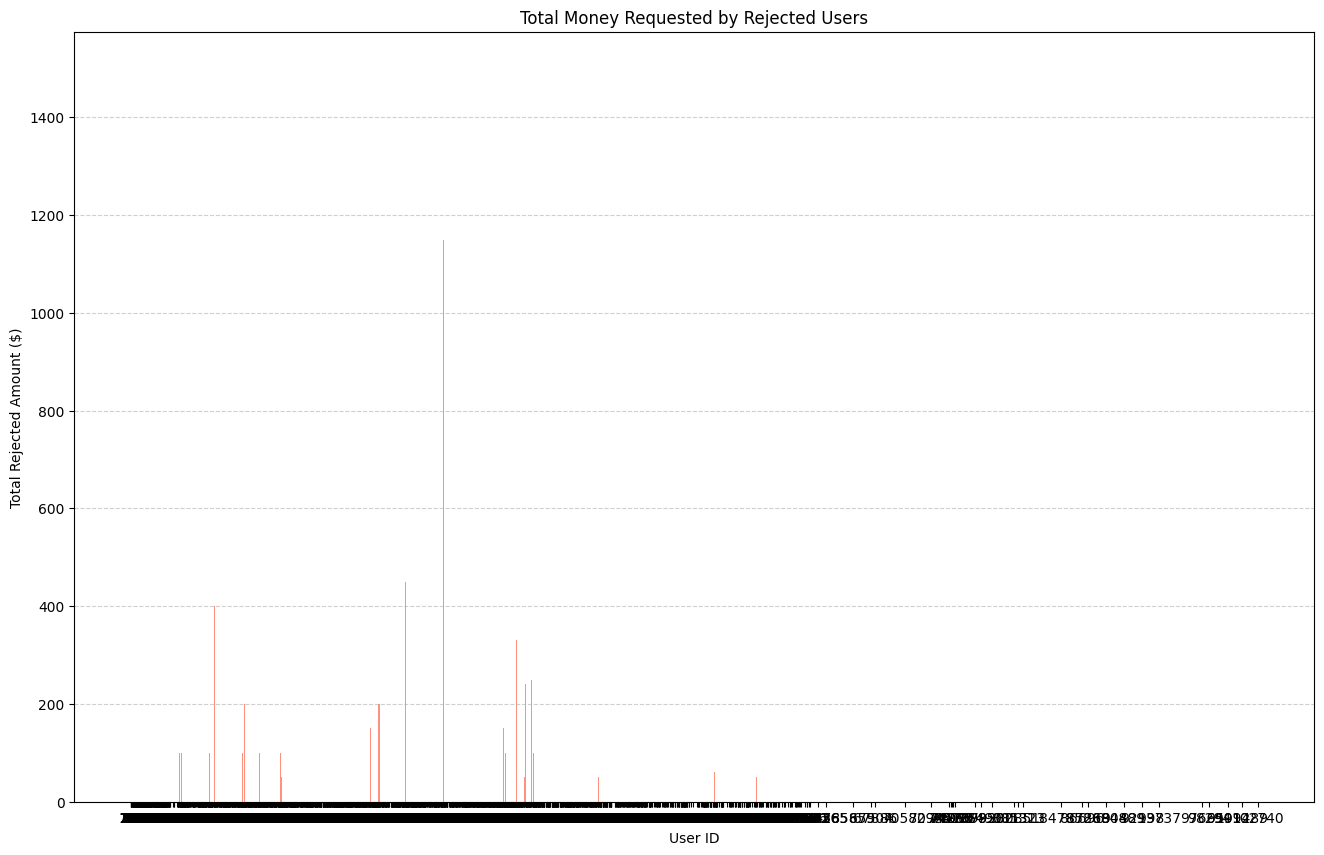

In [62]:
plt.figure(figsize=(16, 10))
plt.bar(rejected_amount_per_user.index, rejected_amount_per_user.values, color='tomato', alpha=0.7)

plt.xlabel("User ID")
plt.ylabel("Total Rejected Amount ($)")
plt.title("Total Money Requested by Rejected Users")
plt.xticks(rejected_amount_per_user.index)  # Ensure user IDs are correctly displayed
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()